In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Вспоминаем numpy

В большинстве приложений для анализа данных основной интерес представляет следующая функциональность:
+ быстрые векторные операции для переформатирования и очистки данных, выборки подмножеств и фильтрации, преобразований и других видов вычислений;
+ стандартные алгоритмы работы с  массивами, например фильтрация, удаление дубликатов и теоретико-множественные операции;
+ эффективная описательная статистика, агрегирование и  обобщение данных;
+ выравнивание данных и реляционные операции объединения и соединения разнородных наборов данных;
+ описание условной логики в виде выражений-массивов вместо циклов с ветвлением if-elif-else;
+ групповые операции с данными (агрегирование, преобразование, применение функции).

Град. бустинг - наиболее распространенный метод.

**Сравнение быстродействия**

Массив хранится единым блоком, а каждый элемент списка - отдельный блок. Т.е. разница в хранении данных. Так, массивы удобнее, когда нужно получить быстрый доступ к данным.

In [2]:
array_ = np.arange(1000000)
list_ = list(array_)

In [3]:
array_

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [4]:
%%time 
array_2 = array_ * 2

Wall time: 16.3 ms


In [5]:
%%time 
list_2 = []
for i in list_:
    list_2.append(i * 2)

Wall time: 325 ms


In [6]:
%%time 
list_2 = [i * 2 for i in list_]

Wall time: 233 ms


numpy выигрывает, так как операцию выполняет сразу для всего, а не последовательно.

**Многомерные массивы**

In [7]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]]) #массив из массивов

In [8]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [9]:
type(data)

numpy.ndarray

In [10]:
data * 2

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [11]:
data + 2

array([[ 3.5,  1.9,  5. ],
       [ 2. , -1. ,  8.5]])

In [12]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

ndarray – это обобщенный многомерный контейнер для однородных данных, т. е. в нем могут храниться только элементы одного типа. У любого массива есть атрибут shape – кортеж, описывающий размер по каждому измерению,
и атрибут dtype – объект, описывающий тип данных в массиве:

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

In [15]:
np.array(["str", 1])

array(['str', '1'], dtype='<U11')

In [16]:
np.array(["str", 1]) * 2

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('int32')) -> None

**Создание массивов**

In [17]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Задание 1**
+ Создать единичную матрицу 4x4;
+ Создать матрицу 4x4, заполненную 5.

In [20]:
data = np.array([[1, 0, 0, 0], [0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]]) 
data


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [21]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [23]:
np.full((4,4), 5)

array([[5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5]])

**Возведение элементов матрицы в квадрат и возведение матрицы в квадрат**

In [24]:
m = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])

In [25]:
m ** 2

array([[ 1,  4,  9],
       [16, 25, 36],
       [ 1,  4,  9]])

In [26]:
np.dot(m, m)

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

In [27]:
m @ m

array([[12, 18, 24],
       [30, 45, 60],
       [12, 18, 24]])

## Индексирование

In [28]:
m[0]

array([1, 2, 3])

In [29]:
m[0, 0]

1

In [30]:
m[0][1:]

array([2, 3])

**Булево индексирование**

In [31]:
m%2 == 1 #проверка на нечетность

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [32]:
m[m%2 == 1]

array([1, 3, 5, 1, 3])

In [33]:
m[~m%2 == 1] #~ для того чтобы найти четные

array([2, 4, 6, 2])

In [34]:
m[m%2 != 1]

array([2, 4, 6, 2])

In [35]:
m[~m%2 == 1] = 100
m

array([[  1, 100,   3],
       [100,   5, 100],
       [  1, 100,   3]])

In [36]:
m.T

array([[  1, 100,   1],
       [100,   5, 100],
       [  3, 100,   3]])

In [37]:
 arr = np.arange(15)

In [39]:
arr.shape
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [40]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [41]:
arr.swapaxes(0, 1) #оси 0 - строки, 1 - столбцы, то же самое, что и трансп.

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [42]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

**Задание 2**\
Отобрать те строки data, где на соответствующих позициях в names имя Леша или Петя.

In [43]:
names = np.array(["Настя", "Петя", "Вася", "Юра", "Паша", "Леша", "Леша"])
data = np.array([[4, 8], [1, 5], [-3, 9], [99, 0], [13, 22], [12, 49], [31, 4]])

In [44]:
# ваш ответ здесь
data[(names == "Леша") | (names == "Петя")]

array([[ 1,  5],
       [12, 49],
       [31,  4]])

## Быстрые поэлементные операции над массивами

In [45]:
arr = np.arange(10)

In [46]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [47]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [48]:
np.maximum(np.sqrt(arr), np.exp(arr)/3)

array([3.33333333e-01, 1.00000000e+00, 2.46301870e+00, 6.69517897e+00,
       1.81993833e+01, 4.94710530e+01, 1.34476264e+02, 3.65544386e+02,
       9.93652662e+02, 2.70102798e+03])

In [49]:
np.floor(np.sqrt(arr)) #округление в большую сторону

array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3.])

In [50]:
np.ceil(np.sqrt(arr))#округление в  меньшую сторону 

array([0., 1., 2., 2., 2., 3., 3., 3., 3., 3.])

In [51]:
np.round(np.sqrt(arr))

array([0., 1., 1., 2., 2., 2., 2., 3., 3., 3.])

## Программирование на основе массивов

In [52]:
points = np.arange(-5, 5, 0.01) # 100 равноотстоящих точек ????
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [53]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [54]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [55]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [56]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [58]:
result = np.where(cond, xarr, yarr) #тоже самое, но быстрее
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [59]:
np.where(xarr > 1.3, 2, xarr) #способ замены по условию

array([1.1, 1.2, 1.3, 2. , 2. ])

**Задача 3**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [60]:
arr = np.random.randint(1, high=100, size=np.random.randint(1,100))
arr

array([15, 43,  9, 24, 31, 94, 55, 85, 66, 69, 51, 28, 76, 23, 61, 22, 30,
       93, 19, 28, 10, 60, 55, 42, 26, 97, 20, 72, 55, 20,  7, 11, 68, 33,
       63, 55,  3, 29, 22, 88,  5, 37, 52, 39, 30,  3, 54, 81,  5,  4, 62,
       15, 28,  7, 86, 88])

In [62]:
arr[arr > arr.mean()]

array([43, 94, 55, 85, 66, 69, 51, 76, 61, 93, 60, 55, 97, 72, 55, 68, 63,
       55, 88, 52, 54, 81, 62, 86, 88])

**Задача 4**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [63]:
#Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
arr = np.random.randint(11, size=20)
arr

array([ 0,  2,  9,  2,  0,  8,  5, 10,  8,  0,  7,  9, 10,  8,  2,  8,  5,
        0,  2, 10])

In [64]:
#Определить количество элементов, отличающихся от минимального на 5.
len(arr[arr.min() == abs(arr - 5)])


2

In [65]:
len(arr[arr.min() == arr - 5])
#так как все числа положительные, минимальное не мб меньше самого себя => имеет смысл вычитать 5

2

In [66]:
#Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.
arr[1::2][arr[1::2]%2==0].mean()

5.333333333333333

**Задача 5**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [67]:
#Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
A = np.random.randint(1, 10, (5, 5))
A

array([[3, 1, 2, 4, 9],
       [9, 8, 2, 9, 1],
       [9, 7, 1, 2, 2],
       [6, 5, 7, 7, 3],
       [5, 9, 3, 8, 8]])

In [68]:
#Возвести в квадрат максимальный элемент матрицы.
np.where(A == A.max(), A**2, A)

array([[ 3,  1,  2,  4, 81],
       [81,  8,  2, 81,  1],
       [81,  7,  1,  2,  2],
       [ 6,  5,  7,  7,  3],
       [ 5, 81,  3,  8,  8]])

In [69]:
#A[A == A.max()] = A[A == A.max()] ** 2
#A

In [70]:
#Все четные числа заменить на 0.
np.where(A%2==0, 0, A)

array([[3, 1, 0, 0, 9],
       [9, 0, 0, 9, 1],
       [9, 7, 1, 0, 0],
       [0, 5, 7, 7, 3],
       [5, 9, 3, 0, 0]])

**Задача 6**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [180]:
B = np.random.randint(-5, 5, (5, 5))
B

array([[ 0,  1, -3,  1,  2],
       [ 0,  0, -3, -5,  2],
       [-5, -5, -2, -1,  1],
       [-4,  2,  3, -3, -4],
       [-2, -4,  0, -5, -1]])

In [181]:
for i in range(len(B)):
    B[i] = np.where(B[i] < 0, len(B[i][B[i] < 0]), B[i])
B

array([[0, 1, 1, 1, 2],
       [0, 0, 2, 2, 2],
       [4, 4, 4, 4, 1],
       [3, 2, 3, 3, 3],
       [4, 4, 0, 4, 4]])

# Вспоминаем pandas несильно

Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
+ School -  название школы
+ School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
+ SAT - медиана объединенных значений Math и Verbal SAT  студентов
+ Acceptance: - % принятых абитуриентов
+ $/Student  -  Деньги, расходуемые на одного студента в среднем
+ Top 10% -  % студентов в топ 10% выпускных классов
+ %PhD -  %  факультетов, имеющих PhD
+ Grad%: % студентов, которые успешно завершили обучение

In [71]:
df = pd.read_csv('colleges.txt', delimiter='\t')

In [72]:
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   School       50 non-null     object
 1   School_Type  50 non-null     object
 2   SAT          50 non-null     int64 
 3   Acceptance   50 non-null     int64 
 4   $/Student    50 non-null     int64 
 5   Top 10%      50 non-null     int64 
 6   %PhD         50 non-null     int64 
 7   Grad%        50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


Вывод статистических сведений о датафрейме:

In [74]:
df.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


**Задание 1**\
Проверить являются ли выборки связными.

Не связанные, так как разные типы школ.

**Задание 2**\
Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

In [135]:
list_ = df.columns.tolist()[2:]

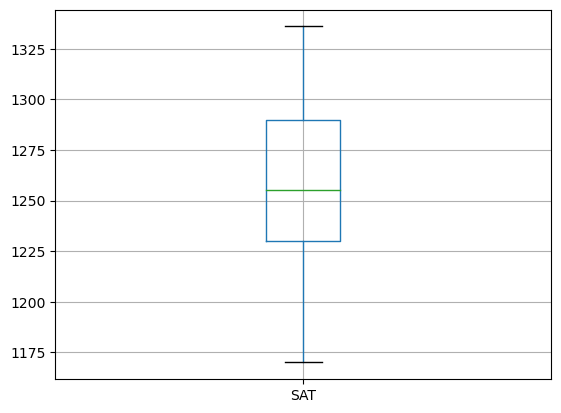

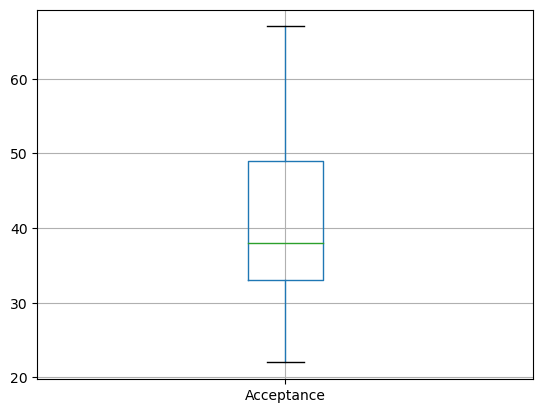

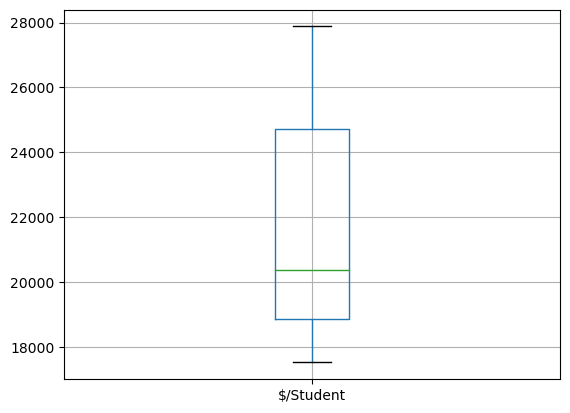

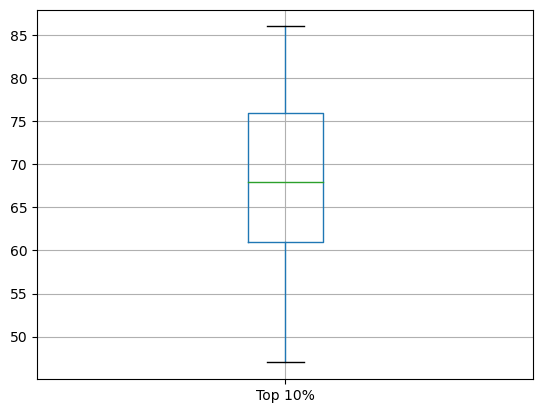

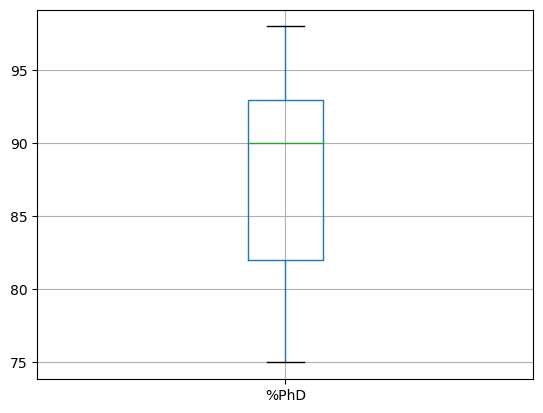

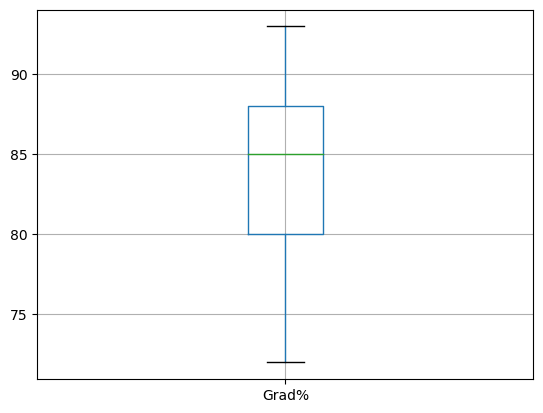

In [144]:
for i in list_:
    df[df['School_Type'] == 'Lib Arts'].boxplot(column=[i])
    plt.show()

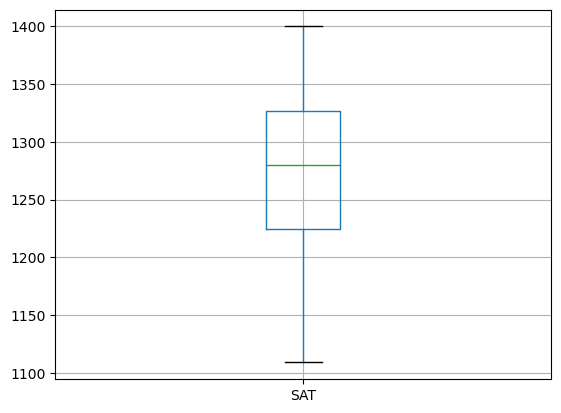

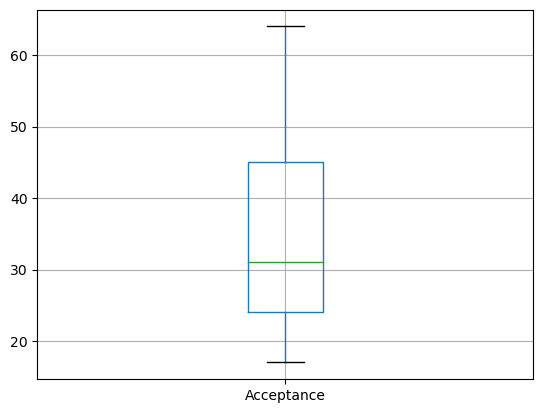

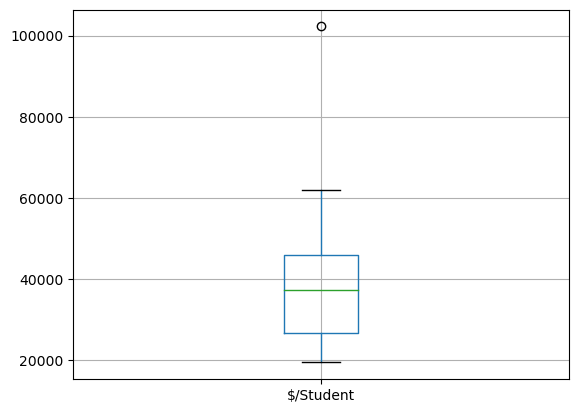

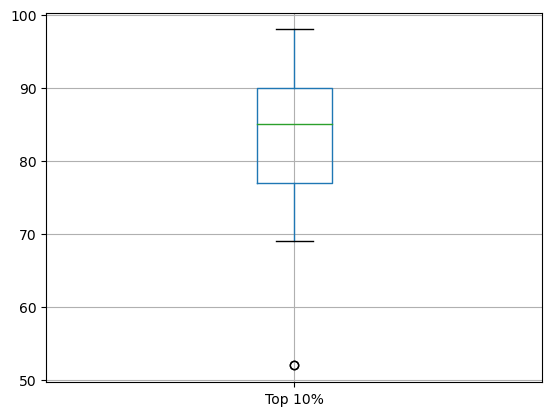

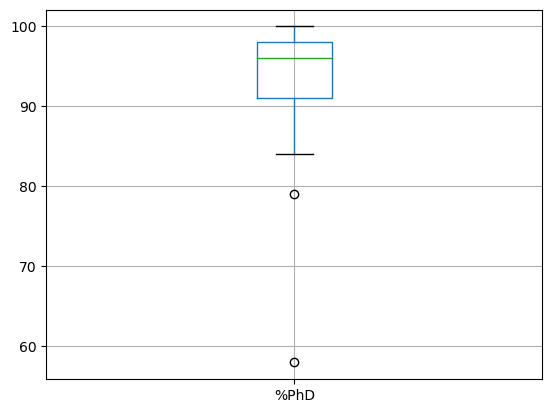

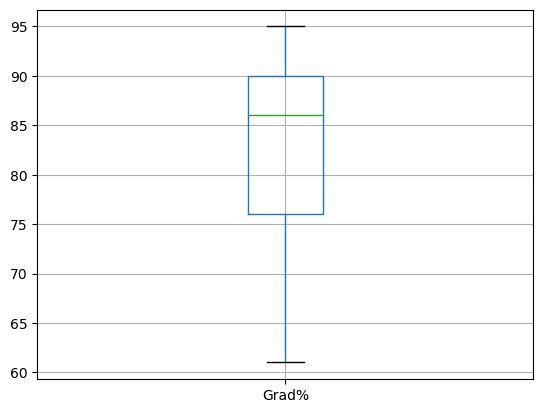

In [145]:
for i in list_:
    df[df['School_Type'] ==  'Univ'].boxplot(column=[i])
    plt.show()

In [87]:
%%HTML
<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно ниже, чем в университетах</label><br>

<input type="checkbox" id="1">
<label for="1">Разброс средств, расходуемых в среднем на одного студента, в школах искусств больше, чем в университетах</label><br>

<input type="checkbox" id="2">
<label for="2">% процент принятых студентов в школах искусств и в университетах примерно равны</label><br>

<input type="checkbox" id="3">
<label for="3">Разброс баллов SAT в университетах ниже, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах выше, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах</label><br>

<input type="checkbox" id="0">
<label for="0">В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах и школах искусств практически не различается</label><br>

<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно выше, чем в университетах</label><br>

**Задание 3**\
Постройте гистограммы по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Hint: для каждой пары связанных утверждений, надо выбрать одно из них.

In [69]:
%%HTML
<input type="checkbox" id="0">
<label for="0"></label>Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"<br>

<input type="checkbox" id="1">
<label for="1">Распределение процента факультетов с Phd в университетах напоминает "нормальное"</label><br>

<input type="checkbox" id="2">
<label for="2"></label>Гистограмма процента студентов, которые успешно завершили университеты, имеет несколько пиков<br>

<input type="checkbox" id="3">
<label for="3">Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков</label><br>

<input type="checkbox" id="5">
<label for="5">В университетах процент факультетов с Phd выше</label><br>

<input type="checkbox" id="4">
<label for="4">В школах искусств процент факультетов с Phd выше</label><br>

В университетах процент факультетов с Phd выше, Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"


**Задание 4**\
Найдите:
+ выборочное среднее SAT школ искусств;
+ 3й выборочный квартиль Acceptance университетов;
+ название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах).

In [147]:
#выборочное среднее
np.mean(df[df['School_Type'] == 'Lib Arts']['SAT'])

1256.64

In [148]:
#3й выборочный квартиль Acceptance университетов
print(np.quantile(df[df['School_Type'] == 'Univ']['Acceptance'], 0.75))

45.0


In [151]:
#название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах)
df[df['$/Student'] == df[df['School_Type'] == 'Univ']['$/Student'].max()]['School']

29    Cal Tech
Name: School, dtype: object